In [1]:
# !pip install seaborn

# First exploration of the dataset at hand

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/5-Clustering/data/nigerian-songs.csv")
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   artist            530 non-null    object 
 3   artist_top_genre  530 non-null    object 
 4   release_date      530 non-null    int64  
 5   length            530 non-null    int64  
 6   popularity        530 non-null    int64  
 7   danceability      530 non-null    float64
 8   acousticness      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  time_signature    530 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory us

In [4]:
df.isnull().sum()

name                0
album               0
artist              0
artist_top_genre    0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

In [5]:
df.describe()

,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2015.390566,222298.169811,17.507547,0.741619,0.265412,0.760623,0.016305,0.147308,-4.953011,0.130748,116.487864,3.986792
std,3.131688,39696.822259,18.992212,0.117522,0.208342,0.148533,0.090321,0.123588,2.464186,0.092939,23.518601,0.333701
min,1998.000000,89488.000000,0.000000,0.255000,0.000665,0.111000,0.000000,0.028300,-19.362000,0.027800,61.695000,3.000000
25%,2014.000000,199305.000000,0.000000,0.681000,0.089525,0.669000,0.000000,0.075650,-6.298750,0.059100,102.961250,4.000000
50%,2016.000000,218509.000000,13.000000,0.761000,0.220500,0.784500,0.000004,0.103500,-4.558500,0.097950,112.714500,4.000000
75%,2017.000000,242098.500000,31.000000,0.829500,0.403000,0.875750,0.000234,0.164000,-3.331000,0.177000,125.039250,4.000000
max,2020.000000,511738.000000,73.000000,0.966000,0.954000,0.995000,0.910000,0.811000,0.582000,0.514000,206.007000,5.000000


# Visualization

## Genre distribution

Text(0.5, 1.0, 'Top genres')

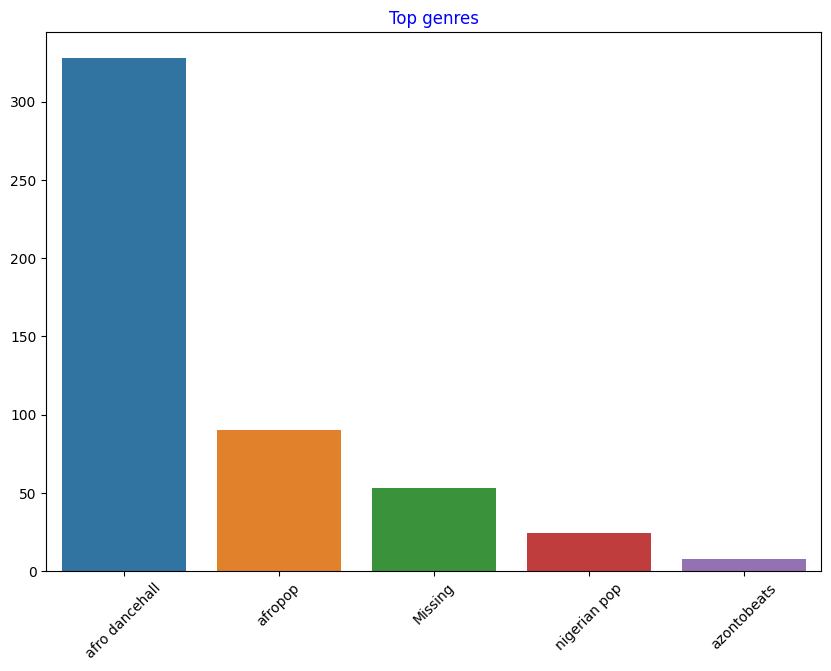

In [6]:
import seaborn as sns

top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:5].index,y=top[:5].values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

Text(0.5, 1.0, 'Top genres')

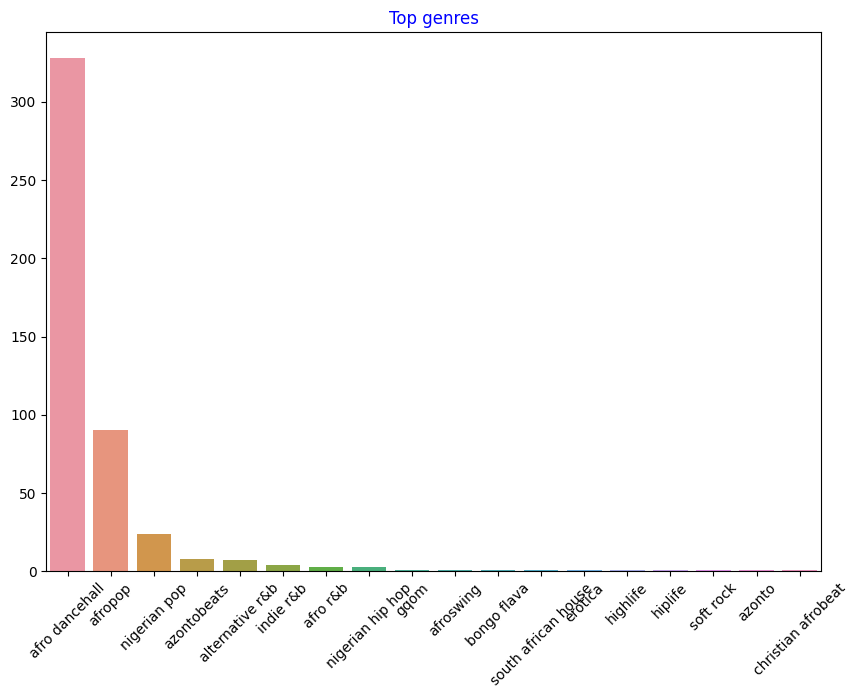

In [7]:
df = df[df['artist_top_genre'] != 'Missing']
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

Text(0.5, 1.0, 'Top genres')

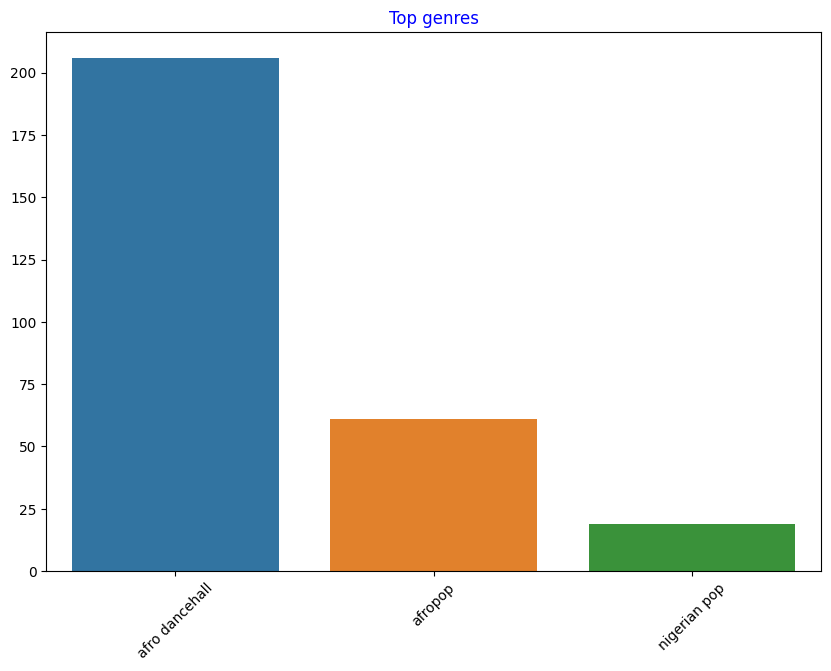

In [8]:
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

## Correlation matrix visualisation

C:\Users\blanco1\AppData\Local\Temp\ipykernel_8200\3182244363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


<Axes: >

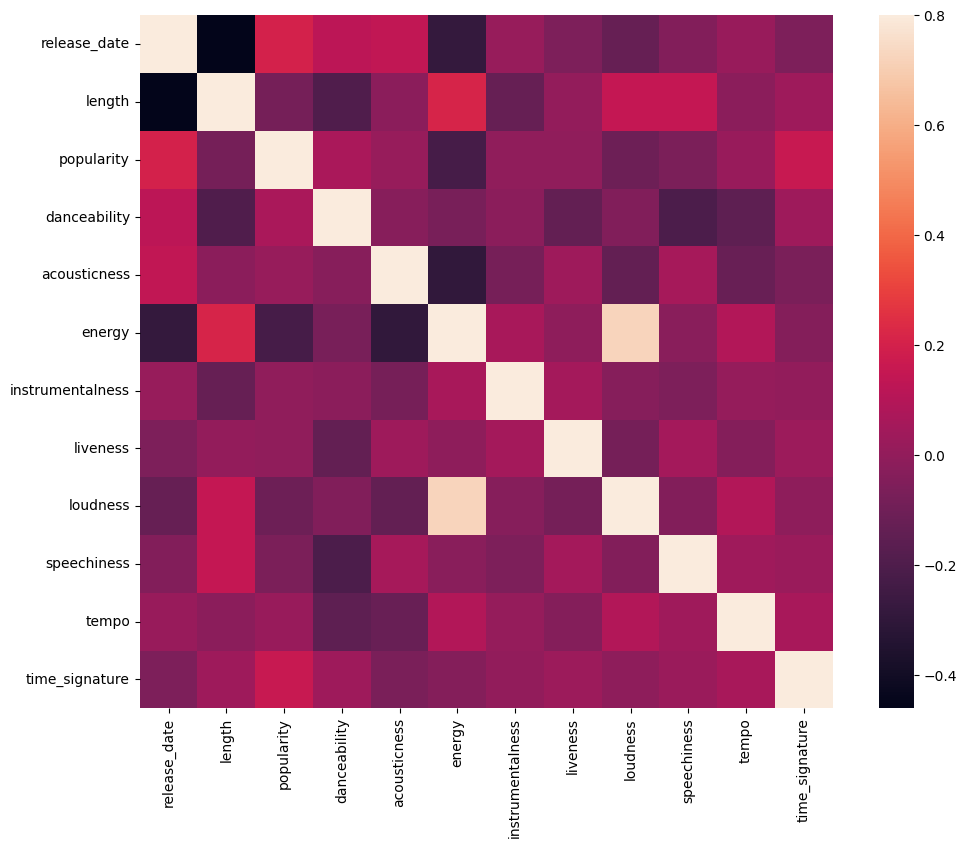

In [9]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

## Visualization of the distribution of variables for different genres

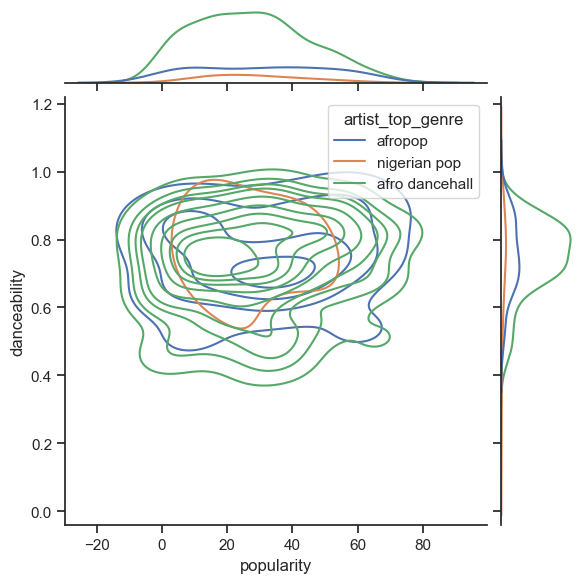

In [10]:
sns.set_theme(style="ticks")

g = sns.jointplot(
    data=df,
    x="popularity", y="danceability", hue="artist_top_genre",
    kind="kde",
)

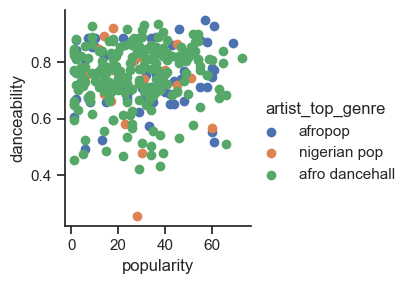

In [11]:
sns.FacetGrid(df, hue="artist_top_genre") \
   .map(plt.scatter, "popularity", "danceability") \
   .add_legend()

<Axes: xlabel='popularity', ylabel='danceability'>

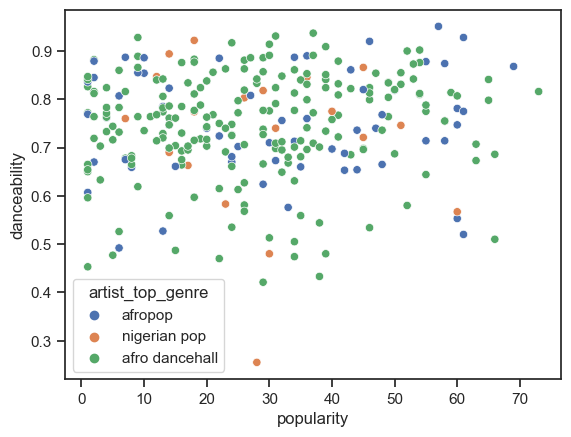

In [12]:
# An alternative way to represent the previous plot
sns.scatterplot(x="popularity", y="danceability", hue="artist_top_genre", data=df)

**Additional exercise**

Use different methods for clustering to understand the flow that is usually followed in this kind of analysis.
Let us explore the main methods:
- K Means
- Hierarchical clustering
- Density-based clustering
- Distribution-based clustering


# Preliminary steps: Variables to include and dimensionality reduction

We need to decide which variables to include into the clustering algorithms. This will have a strong influence on the outcome of the analysis. Since clustering is mainly an exploratory tool, we need to somehow align the goal of our exploration with the design choices that we make along the way.

Regardless of the goal of the clustering analysis, there are a couple of points to consider in general when approaching a clustering exercise:
- The type of variable matters: discrete variables will always be more complicated to include than float variables. The main options here are to use techniques like one-hot encoding or use some kind of embedding technique.
- Reaching conclusions when examining high-dimensional feature spaces will always be more difficult. Applying a dimensionality reduction technique will at least enable to visually inspect the results of the clustering. This is very important since there is no easy alternative to evaluate the validity of the results.

Let us use the most well-known dimensionality reduction technique on this dataset to help us visualize the clustering results from different techniques.

In [13]:
df.columns

Index(['name', 'album', 'artist', 'artist_top_genre', 'release_date', 'length',
       'popularity', 'danceability', 'acousticness', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'time_signature'],
      dtype='object')

Ratio explained variance:  [9.99999440e-01 3.55623011e-07]


<Axes: >

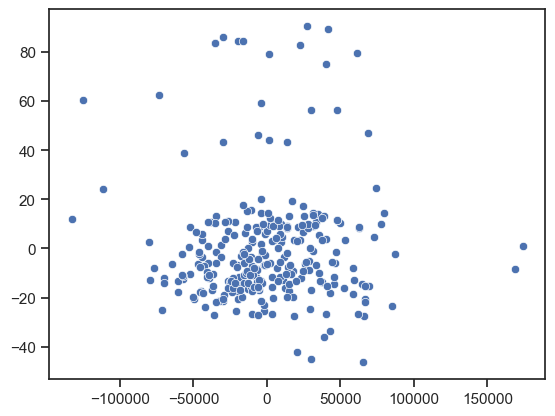

In [23]:
import numpy as np
from sklearn.decomposition import PCA

clustering_variables = [
    'length',
    'popularity', 'danceability', 'acousticness', 'energy',
    'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo'
]
X = df[clustering_variables]

pca = PCA(n_components=2)
pca.fit(X)

print("Ratio explained variance: ", pca.explained_variance_ratio_)

X_pca = pca.transform(X)

# Let's visualize the set of variables when considering just the two first components
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])

## K-Means

Label for a random point:  [0 0]
Positions of cluster centers [[-2.52405128e+04 -8.75473189e-01]
 [ 3.59356453e+04  1.24643641e+00]]


<Axes: >

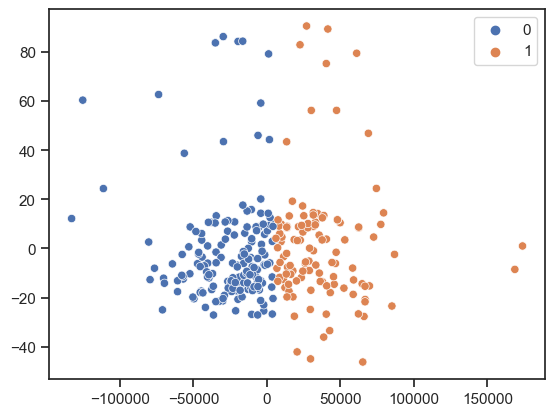

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_pca)
labels_kmeans = kmeans.labels_

print("Label for a random point: ", kmeans.predict([[0, 0], [12, 3]]))
print("Positions of cluster centers", kmeans.cluster_centers_)


sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_kmeans)

## Agglomerative clustering

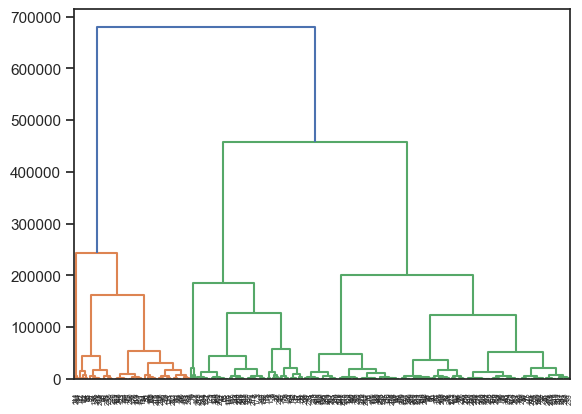

In [44]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=100).fit(X_pca)

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(clustering)

## Density-based methods: DBSCAN

<Axes: >

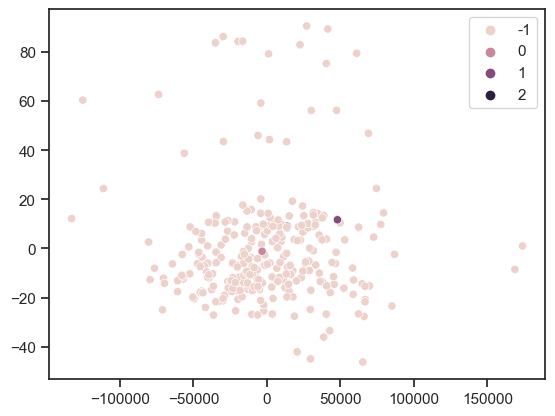

In [28]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=3, min_samples=2).fit(X_pca)
clustering.labels_


labels_dbscan = clustering.labels_
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_dbscan)

## Distribution-based methods: Gaussian Mixtures

Mean for each distribution:  [[-3.42919301e+03 -5.44437260e+00]
 [ 1.54709483e+04  2.45625156e+01]]
Covariances matrices for each distribution:  [[[ 1.04458793e+09  6.45923799e+04]
  [ 6.45923799e+04  1.33752485e+02]]

 [[ 3.54329489e+09 -7.55646249e+05]
  [-7.55646249e+05  1.69953495e+03]]]


<Axes: >

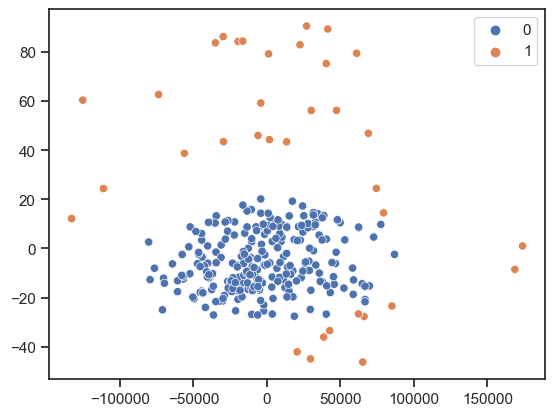

In [46]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, random_state=0).fit(X_pca)
print("Mean for each distribution: ", gm.means_)
print("Covariances matrices for each distribution: ", gm.covariances_)

labels_gm = gm.predict(X_pca)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_gm)